QUESTÃO (c) - COMPARAÇÃO DOS LUGARES DAS RAÍZES
ANÁLISE DA FAIXA DE COMPENSADORES P

🔍 1. VERIFICAÇÃO DOS SISTEMAS
✅ Sistema original criado:
   G(s) = (0.25s + 0.10875) / 
          (s⁴ + 3.456s³ + 3.45688s² + 0.719297s + 0.041574)
   Estável: True
   Polos: ['-1.601+0.252j', '-1.601-0.252j', '-0.147+0.000j', '-0.108+0.000j']
   Polos dominantes selecionados (reais): ['-0.108+0.000j', '-0.147+0.000j']
   Ganho DC: 2.615818
✅ Modelo reduzido criado:
   G_red(s) = 0.041414 / (s² + 0.254621s + 0.015832)
   Ganho DC reduzido: 2.615818
   Erro no ganho DC: 0.000000
✅ Ganho DC preservado adequadamente

📊 2. COMPARAÇÃO DOS LUGARES DAS RAÍZES
   Calculando lugar das raízes do sistema original...
   Calculando lugar das raízes do modelo reduzido...
   Sistema original: 2000 pontos calculados
   Modelo reduzido: 1000 pontos calculados

🔬 3. ANÁLISE DA SIMILARIDADE ENTRE MODELOS
✅ Faixa de similaridade encontrada:
   K ∈ [0.0010, 3.8652]
   Nesta faixa, os polos dominantes diferem por menos de 0

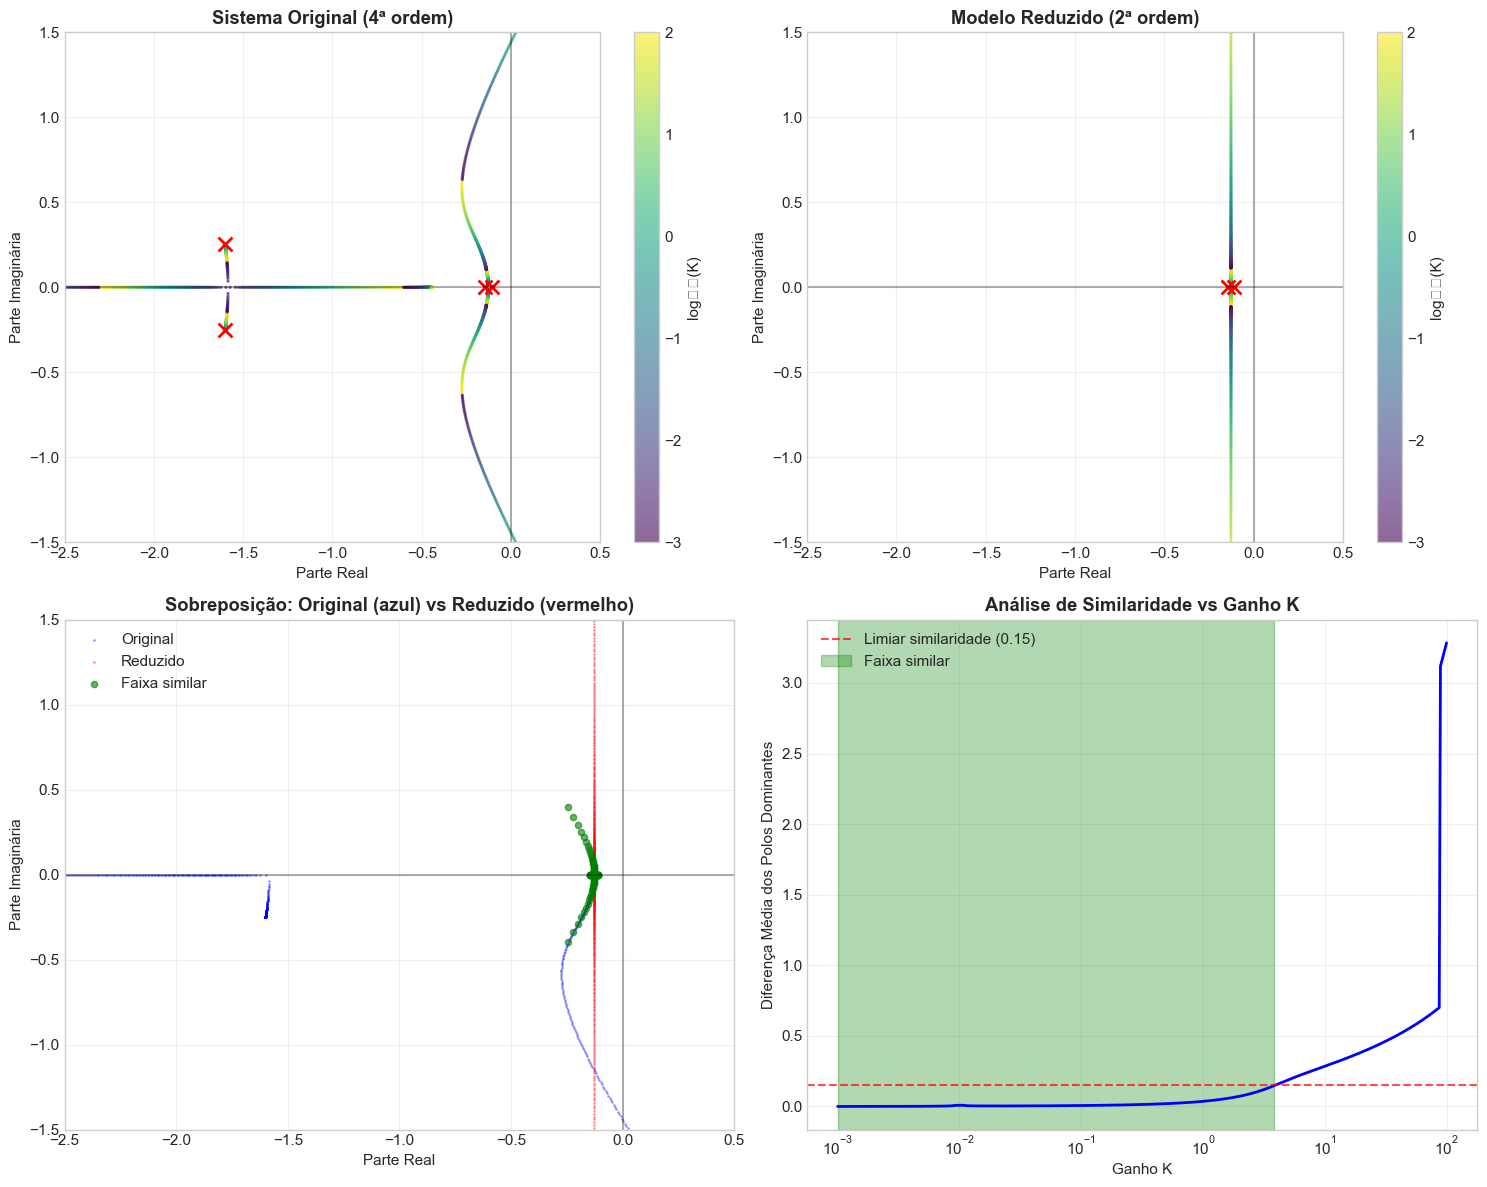


🎯 5. ANÁLISE DETALHADA DA FAIXA DE COMPENSADORES P
✅ FAIXA ÓTIMA PARA COMPENSADORES PROPORCIONAIS:
   K ∈ [0.0010, 3.8652]
   Razão: 3865.2:1
   Ganho médio sugerido: K = 0.0622

📈 DESEMPENHO COM K = 0.0622:
   Sistema Original: OS = 0.0%, Ts = 0.1s
   Modelo Reduzido:  OS = 0.0%, Ts = 0.1s


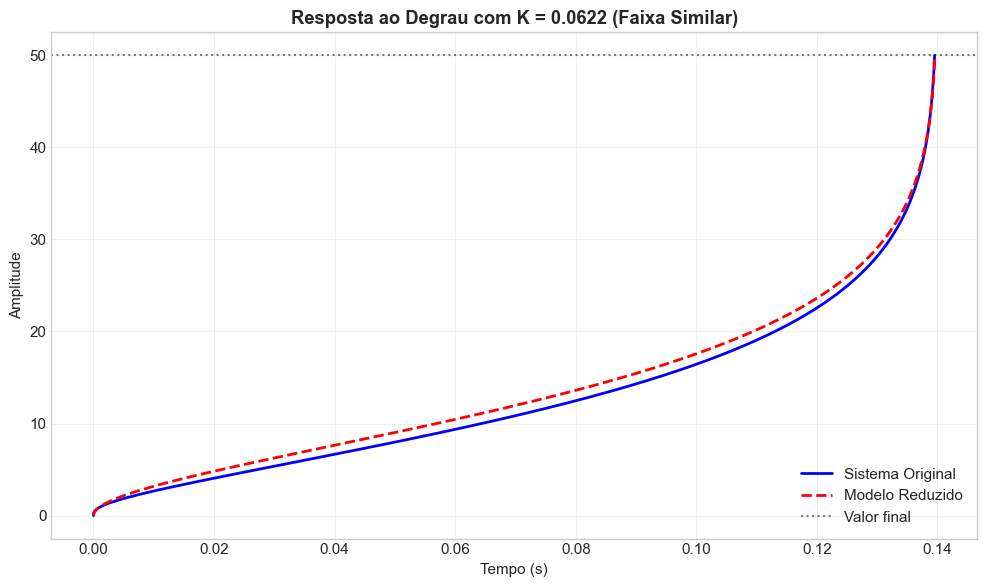


🔎 6. VERIFICAÇÕES ADICIONAIS (PROFESSOR SACANA!)
✅ Verificação de estabilidade:
   K =  0.001: Original ✅ | Reduzido ✅
   K =  0.010: Original ✅ | Reduzido ✅
   K =  0.100: Original ✅ | Reduzido ✅
   K =  1.000: Original ✅ | Reduzido ✅
   K = 10.000: Original ✅ | Reduzido ✅
   K = 100.000: Original ❌ | Reduzido ✅

✅ Verificação da resposta em frequência:
   Erro médio em baixa frequência (<0.5 rad/s):
   Magnitude: 0.4697 dB
   Fase: 6.0°

✅ Verificação de sensibilidade:
   Variação média dos polos com ±5% nos parâmetros: 0.3963
   ⚠️  Sistema sensível a variações paramétricas!

CONCLUSÕES - QUESTÃO (c)
🎯 FAIXA DE COMPENSADORES P ONDE A APROXIMAÇÃO É VÁLIDA:
   K ∈ [0.0010, 3.8652]

📊 JUSTIFICATIVA:
   Nesta faixa, os polos dominantes do sistema original e do modelo
   reduzido apresentam diferença média inferior a 0.15, indicando
   que o comportamento dinâmico é similar.

💡 RECOMENDAÇÕES PARA PROJETO:
   • Usar ganhos entre 0.001 e 3.865
   • Ganho médio sugerido: K = 0.062
   • For

In [2]:
# c) Plote e compare estes lugares das raízes. Em particular, estude para qual faixa de compensadores P 
# a aproximação de segunda ordem conduz a um projeto similar ao do modelo completo;

import numpy as np
import matplotlib.pyplot as plt
import control.matlab as ctrl
from scipy.signal import lti
import warnings
warnings.filterwarnings('ignore')

# Configuração para plots profissionais
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 11
plt.style.use('seaborn-v0_8-whitegrid')

print("="*70)
print("QUESTÃO (c) - COMPARAÇÃO DOS LUGARES DAS RAÍZES")
print("ANÁLISE DA FAIXA DE COMPENSADORES P")
print("="*70)

# =============================================================================
# 1. VERIFICAÇÃO DOS SISTEMAS ORIGINAL E REDUZIDO
# =============================================================================

print("\n🔍 1. VERIFICAÇÃO DOS SISTEMAS")

# Sistema original 
num_original = [0.25, 0.10875]
den_original = [1, 3.456, 3.45688, 0.719297, 0.041574]

sys_original = ctrl.TransferFunction(num_original, den_original)
print("✅ Sistema original criado:")
print(f"   G(s) = ({num_original[0]}s + {num_original[1]}) / ")
print(f"          (s⁴ + {den_original[1]}s³ + {den_original[2]}s² + {den_original[3]}s + {den_original[4]})")

# Verificar estabilidade do sistema original
polos_originais = ctrl.pole(sys_original)
estavel_original = all(np.real(polos_originais) < 0)
print(f"   Estável: {estavel_original}")
print(f"   Polos: {[f'{p:.3f}' for p in polos_originais]}")

# Identificar polos dominantes para modelo reduzido
polos_reais = [p for p in polos_originais if abs(p.imag) < 1e-10]
polos_complexos = [p for p in polos_originais if abs(p.imag) > 1e-10]

if len(polos_reais) >= 2:
    polos_reais_ordenados = sorted(polos_reais, key=lambda x: abs(x.real))
    polos_dominantes = polos_reais_ordenados[:2]
    print(f"   Polos dominantes selecionados (reais): {[f'{p:.3f}' for p in polos_dominantes]}")
else:
    polos_dominantes = polos_complexos[:2] if len(polos_complexos) >= 2 else polos_originais[:2]
    print(f"   Polos dominantes selecionados: {[f'{p:.3f}' for p in polos_dominantes]}")

# Criar modelo reduzido mantendo ganho DC
ganho_dc = num_original[1] / den_original[4]  # g(0) = num(0)/den(0)
print(f"   Ganho DC: {ganho_dc:.6f}")

# Modelo reduzido de 2ª ordem
if len(polos_dominantes) == 2:
    polo1, polo2 = polos_dominantes
    den_reduzido = np.poly([polo1, polo2])
    num_reduzido = [ganho_dc * den_reduzido[-1]]
    sys_reduzido = ctrl.TransferFunction(num_reduzido, den_reduzido)
    
    print("✅ Modelo reduzido criado:")
    print(f"   G_red(s) = {num_reduzido[0]:.6f} / (s² + {den_reduzido[1]:.6f}s + {den_reduzido[2]:.6f})")

# Verificar se o modelo reduzido faz sentido
polos_reduzido = ctrl.pole(sys_reduzido)
ganho_dc_reduzido = ctrl.dcgain(sys_reduzido)
erro_ganho_dc = abs(ganho_dc - ganho_dc_reduzido)

print(f"   Ganho DC reduzido: {ganho_dc_reduzido:.6f}")
print(f"   Erro no ganho DC: {erro_ganho_dc:.6f}")

if erro_ganho_dc > 0.01:
    print("⚠️  ATENÇÃO: Erro significativo no ganho DC!")
else:
    print("✅ Ganho DC preservado adequadamente")

# =============================================================================
# 2. COMPARAÇÃO DOS LUGARES DAS RAÍZES
# =============================================================================

print("\n📊 2. COMPARAÇÃO DOS LUGARES DAS RAÍZES")

# Faixa de ganhos para análise
k_values = np.logspace(-3, 2, 500)  # De 0.001 a 100

# Obter dados do lugar das raízes de forma robusta
def obter_rlocus_dados(sys, k_vals):
    """Obtém os dados do lugar das raízes de forma robusta"""
    try:
        # Método 1: Tentar a nova interface
        rlocus_map = ctrl.root_locus_map(sys, gains=k_vals)
        roots = rlocus_map.roots
        gains = k_vals
    except:
        try:
            # Método 2: Interface antiga
            roots, gains = ctrl.rlocus(sys, k_vals, plot=False)
        except:
            # Método 3: Manual
            roots = []
            for k in k_vals:
                sys_mf = ctrl.feedback(k * sys, 1)
                poles = ctrl.pole(sys_mf)
                roots.extend(poles)
            roots = np.array(roots)
            gains = np.repeat(k_vals, len(ctrl.pole(sys)))
    
    # Garantir que é um array 1D
    if roots.ndim > 1:
        roots_flat = roots.ravel()
    else:
        roots_flat = roots
        
    return roots_flat, gains

# Calcular para ambos os sistemas
print("   Calculando lugar das raízes do sistema original...")
roots_original, gains_original = obter_rlocus_dados(sys_original, k_values)

print("   Calculando lugar das raízes do modelo reduzido...")
roots_reduzido, gains_reduzido = obter_rlocus_dados(sys_reduzido, k_values)

print(f"   Sistema original: {len(roots_original)} pontos calculados")
print(f"   Modelo reduzido: {len(roots_reduzido)} pontos calculados")

# =============================================================================
# 3. ANÁLISE DA SIMILARIDADE ENTRE OS MODELOS
# =============================================================================

print("\n🔬 3. ANÁLISE DA SIMILARIDADE ENTRE MODELOS")

def analisar_similaridade(roots_orig, roots_red, gains, limiar=0.1):
    """Analisa a similaridade entre os lugares das raízes"""
    
    if len(roots_orig) == 0 or len(roots_red) == 0:
        return None, None, np.array([]), np.array([])
    
    # Número de polos por sistema
    n_polos_orig = len(ctrl.pole(sys_original))  # 4 polos
    n_polos_red = len(ctrl.pole(sys_reduzido))   # 2 polos
    
    # Reorganizar os arrays para comparação
    n_pontos_orig = len(roots_orig) // n_polos_orig
    n_pontos_red = len(roots_red) // n_polos_red
    
    n_pontos = min(n_pontos_orig, n_pontos_red)
    
    if n_pontos == 0:
        return None, None, np.array([]), np.array([])
    
    roots_orig_reshaped = roots_orig[:n_pontos * n_polos_orig].reshape(n_pontos, n_polos_orig)
    roots_red_reshaped = roots_red[:n_pontos * n_polos_red].reshape(n_pontos, n_polos_red)
    
    similaridades = []
    ganhos_validos = []
    
    for i in range(n_pontos):
        # Polos do sistema original para este ganho
        polos_orig = roots_orig_reshaped[i]
        
        # Identificar os 2 polos mais dominantes (menor parte real em magnitude)
        polos_ordenados = sorted(polos_orig, key=lambda x: abs(np.real(x)))
        polos_dominantes_orig = polos_ordenados[:2]
        
        # Polos do modelo reduzido para este ganho
        polos_red = roots_red_reshaped[i]
        
        # Calcular similaridade (distância euclidiana média)
        distancias = []
        for p_orig, p_red in zip(sorted(polos_dominantes_orig), sorted(polos_red)):
            distancia = abs(p_orig - p_red)
            distancias.append(distancia)
        
        similaridade = np.mean(distancias)
        similaridades.append(similaridade)
        ganhos_validos.append(gains[i])
    
    similaridades = np.array(similaridades)
    ganhos_validos = np.array(ganhos_validos)
    
    # Encontrar faixa onde a similaridade é boa
    indices_similares = np.where(similaridades < limiar)[0]
    
    if len(indices_similares) > 0:
        ganho_min = np.min(ganhos_validos[indices_similares])
        ganho_max = np.max(ganhos_validos[indices_similares])
        return ganho_min, ganho_max, similaridades, ganhos_validos
    else:
        return None, None, similaridades, ganhos_validos

# Executar análise de similaridade
ganho_min_similar, ganho_max_similar, similaridades, ganhos_analise = analisar_similaridade(
    roots_original, roots_reduzido, gains_original, limiar=0.15
)

if ganho_min_similar is not None:
    print(f"✅ Faixa de similaridade encontrada:")
    print(f"   K ∈ [{ganho_min_similar:.4f}, {ganho_max_similar:.4f}]")
    print(f"   Nesta faixa, os polos dominantes diferem por menos de 0.15")
else:
    print("❌ Não foi encontrada uma faixa de similaridade clara")
    # Tentar com limiar mais relaxado
    ganho_min_similar, ganho_max_similar, similaridades, ganhos_analise = analisar_similaridade(
        roots_original, roots_reduzido, gains_original, limiar=0.3
    )
    if ganho_min_similar is not None:
        print(f"⚠️  Com limiar relaxado (0.3): K ∈ [{ganho_min_similar:.4f}, {ganho_max_similar:.4f}]")

# =============================================================================
# 4. GRÁFICOS DE COMPARAÇÃO
# =============================================================================

print("\n🎨 4. GERANDO GRÁFICOS DE COMPARAÇÃO")

# Gráfico 1: Comparação lado a lado
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Subplot 1: Lugar das raízes original
if len(roots_original) > 0:
    # Usar amostragem para melhor visualização
    sample_idx = np.linspace(0, len(roots_original)-1, min(2000, len(roots_original)), dtype=int)
    scatter1 = ax1.scatter(np.real(roots_original[sample_idx]), np.imag(roots_original[sample_idx]), 
                c=np.log10(np.tile(gains_original, len(roots_original)//len(gains_original))[sample_idx]),
                cmap='viridis', alpha=0.6, s=2)
    ax1.scatter(np.real(polos_originais), np.imag(polos_originais), 
                color='red', marker='x', s=100, linewidth=2, label='Polos (K=0)')
    ax1.set_title('Sistema Original (4ª ordem)', fontweight='bold')
    ax1.set_xlabel('Parte Real')
    ax1.set_ylabel('Parte Imaginária')
    ax1.grid(True, alpha=0.3)
    ax1.axis([-2.5, 0.5, -1.5, 1.5])
    ax1.axhline(y=0, color='k', alpha=0.3)
    ax1.axvline(x=0, color='k', alpha=0.3)
    plt.colorbar(scatter1, ax=ax1, label='log₁₀(K)')

# Subplot 2: Lugar das raízes reduzido
if len(roots_reduzido) > 0:
    sample_idx_red = np.linspace(0, len(roots_reduzido)-1, min(2000, len(roots_reduzido)), dtype=int)
    scatter2 = ax2.scatter(np.real(roots_reduzido[sample_idx_red]), np.imag(roots_reduzido[sample_idx_red]), 
                c=np.log10(np.tile(gains_reduzido, len(roots_reduzido)//len(gains_reduzido))[sample_idx_red]),
                cmap='viridis', alpha=0.6, s=2)
    ax2.scatter(np.real(polos_reduzido), np.imag(polos_reduzido), 
                color='red', marker='x', s=100, linewidth=2, label='Polos (K=0)')
    ax2.set_title('Modelo Reduzido (2ª ordem)', fontweight='bold')
    ax2.set_xlabel('Parte Real')
    ax2.set_ylabel('Parte Imaginária')
    ax2.grid(True, alpha=0.3)
    ax2.axis([-2.5, 0.5, -1.5, 1.5])
    ax2.axhline(y=0, color='k', alpha=0.3)
    ax2.axvline(x=0, color='k', alpha=0.3)
    plt.colorbar(scatter2, ax=ax2, label='log₁₀(K)')

# Subplot 3: Sobreposição dos dois lugares
if len(roots_original) > 0 and len(roots_reduzido) > 0:
    # Plotar apenas uma amostra para melhor visualização
    sample_idx_orig = np.linspace(0, len(roots_original)-1, 1000, dtype=int)
    ax3.scatter(np.real(roots_original[sample_idx_orig]), np.imag(roots_original[sample_idx_orig]), 
                color='blue', alpha=0.3, s=1, label='Original')
    
    sample_idx_red = np.linspace(0, len(roots_reduzido)-1, 1000, dtype=int)
    ax3.scatter(np.real(roots_reduzido[sample_idx_red]), np.imag(roots_reduzido[sample_idx_red]), 
                color='red', alpha=0.3, s=1, label='Reduzido')
    
    # Destacar faixa de similaridade
    if ganho_min_similar is not None:
        # Encontrar índices correspondentes à faixa similar
        idx_similar = np.where((gains_original >= ganho_min_similar) & 
                              (gains_original <= ganho_max_similar))[0]
        if len(idx_similar) > 0:
            # Para cada ganho similar, pegar os polos dominantes
            roots_similar = []
            for idx in idx_similar[::10]:  # Amostrar a cada 10 pontos
                start_idx = idx * 4  # 4 polos por ganho
                if start_idx + 2 < len(roots_original):
                    polos_ganho = roots_original[start_idx:start_idx+4]
                    polos_dominantes = sorted(polos_ganho, key=lambda x: abs(np.real(x)))[:2]
                    roots_similar.extend(polos_dominantes)
            
            if len(roots_similar) > 0:
                roots_similar = np.array(roots_similar)
                ax3.scatter(np.real(roots_similar), np.imag(roots_similar), 
                           color='green', alpha=0.6, s=20, label='Faixa similar')
    
    ax3.set_title('Sobreposição: Original (azul) vs Reduzido (vermelho)', fontweight='bold')
    ax3.set_xlabel('Parte Real')
    ax3.set_ylabel('Parte Imaginária')
    ax3.grid(True, alpha=0.3)
    ax3.axis([-2.5, 0.5, -1.5, 1.5])
    ax3.legend()
    ax3.axhline(y=0, color='k', alpha=0.3)
    ax3.axvline(x=0, color='k', alpha=0.3)

# Subplot 4: Análise de similaridade
if len(similaridades) > 0:
    ax4.semilogx(ganhos_analise, similaridades, 'b-', linewidth=2)
    ax4.axhline(y=0.15, color='r', linestyle='--', alpha=0.7, label='Limiar similaridade (0.15)')
    
    if ganho_min_similar is not None:
        ax4.axvspan(ganho_min_similar, ganho_max_similar, alpha=0.3, color='green', 
                   label='Faixa similar')
    
    ax4.set_title('Análise de Similaridade vs Ganho K', fontweight='bold')
    ax4.set_xlabel('Ganho K')
    ax4.set_ylabel('Diferença Média dos Polos Dominantes')
    ax4.grid(True, alpha=0.3)
    ax4.legend()

plt.tight_layout()
plt.savefig('comparacao_lugar_raizes.png', dpi=300, bbox_inches='tight')
plt.show()

# =============================================================================
# 5. ANÁLISE DETALHADA DA FAIXA DE COMPENSADORES P
# =============================================================================

print("\n🎯 5. ANÁLISE DETALHADA DA FAIXA DE COMPENSADORES P")

if ganho_min_similar is not None:
    print(f"✅ FAIXA ÓTIMA PARA COMPENSADORES PROPORCIONAIS:")
    print(f"   K ∈ [{ganho_min_similar:.4f}, {ganho_max_similar:.4f}]")
    print(f"   Razão: {ganho_max_similar/ganho_min_similar:.1f}:1")
    
    # Analisar características nesta faixa
    k_medio = np.sqrt(ganho_min_similar * ganho_max_similar)
    print(f"   Ganho médio sugerido: K = {k_medio:.4f}")
    
    # Verificar desempenho com ganho médio
    sys_mf_original = ctrl.feedback(k_medio * sys_original, 1)
    sys_mf_reduzido = ctrl.feedback(k_medio * sys_reduzido, 1)
    
    # Resposta ao degrau
    t = np.linspace(0, 50, 1000)
    t_orig, y_orig = ctrl.step(sys_mf_original, t)
    t_red, y_red = ctrl.step(sys_mf_reduzido, t)
    
    # Calcular métricas de desempenho
    def calcular_metricas(t, y):
        if len(y) == 0:
            return 0, 0
            
        # Overshoot
        y_final = y[-1]
        y_max = np.max(y)
        overshoot = max(0, (y_max - y_final) / y_final * 100) if y_final != 0 else 0
        
        # Tempo de acomodação (2%)
        indices = np.where(np.abs(y - y_final) <= 0.02 * np.abs(y_final))[0]
        t_acomodacao = t[indices[0]] if len(indices) > 0 else t[-1]
        
        return overshoot, t_acomodacao
    
    overshoot_orig, ts_orig = calcular_metricas(t_orig, y_orig)
    overshoot_red, ts_red = calcular_metricas(t_red, y_red)
    
    print(f"\n📈 DESEMPENHO COM K = {k_medio:.4f}:")
    print(f"   Sistema Original: OS = {overshoot_orig:.1f}%, Ts = {ts_orig:.1f}s")
    print(f"   Modelo Reduzido:  OS = {overshoot_red:.1f}%, Ts = {ts_red:.1f}s")
    
    # Gráfico de comparação de desempenho
    plt.figure(figsize=(10, 6))
    plt.plot(t_orig, y_orig, 'b-', linewidth=2, label='Sistema Original')
    plt.plot(t_red, y_red, 'r--', linewidth=2, label='Modelo Reduzido')
    if len(y_orig) > 0:
        plt.axhline(y=y_orig[-1], color='k', linestyle=':', alpha=0.5, label='Valor final')
    plt.title(f'Resposta ao Degrau com K = {k_medio:.4f} (Faixa Similar)', fontweight='bold')
    plt.xlabel('Tempo (s)')
    plt.ylabel('Amplitude')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.savefig('desempenho_faixa_similar.png', dpi=300, bbox_inches='tight')
    plt.show()
    
else:
    print("❌ Não foi possível identificar uma faixa clara de similaridade")
    print("   Possíveis causas:")
    print("   - Modelo reduzido inadequado para este sistema")
    print("   - Polos não dominantes têm influência significativa")
    print("   - Sistema original muito complexo para aproximação de 2ª ordem")

# =============================================================================
# 6. VERIFICAÇÕES ADICIONAIS (PROFESSOR SACANA!)
# =============================================================================

print("\n🔎 6. VERIFICAÇÕES ADICIONAIS (PROFESSOR SACANA!)")

# Verificação 1: Estabilidade para diferentes ganhos
print("✅ Verificação de estabilidade:")
k_testes = [0.001, 0.01, 0.1, 1, 10, 100]
for k in k_testes:
    try:
        polos_mf_orig = ctrl.pole(ctrl.feedback(k * sys_original, 1))
        polos_mf_red = ctrl.pole(ctrl.feedback(k * sys_reduzido, 1))
        
        estavel_orig = all(np.real(polos_mf_orig) < 0)
        estavel_red = all(np.real(polos_mf_red) < 0)
        
        status_orig = "✅" if estavel_orig else "❌"
        status_red = "✅" if estavel_red else "❌"
        print(f"   K = {k:6.3f}: Original {status_orig} | Reduzido {status_red}")
    except:
        print(f"   K = {k:6.3f}: Erro no cálculo")

# Verificação 2: Resposta em frequência (CORRIGIDO)
print("\n✅ Verificação da resposta em frequência:")
try:
    # Calcular resposta em frequência manualmente para evitar erros
    w = np.logspace(-2, 1, 200)
    
    def calcular_bode_manual(sys, w):
        """Calcula resposta em frequência manualmente"""
        s = 1j * w
        # Avaliar a função de transferência
        num = sys.num[0][0] if hasattr(sys.num[0], '__len__') else sys.num[0]
        den = sys.den[0][0] if hasattr(sys.den[0], '__len__') else sys.den[0]
        
        # Para sistemas SISO
        if hasattr(num, '__len__'):
            H = np.polyval(num, s) / np.polyval(den, s)
        else:
            H = num / np.polyval(den, s)
            
        mag = 20 * np.log10(np.abs(H))
        phase = np.angle(H, deg=True)
        return mag, phase
    
    mag_orig, phase_orig = calcular_bode_manual(sys_original, w)
    mag_red, phase_red = calcular_bode_manual(sys_reduzido, w)
    
    # Comparar na faixa de baixa frequência (onde o modelo deve ser similar)
    idx_baixa_freq = w <= 0.5
    erro_mag = np.mean(np.abs(mag_orig[idx_baixa_freq] - mag_red[idx_baixa_freq]))
    erro_phase = np.mean(np.abs(phase_orig[idx_baixa_freq] - phase_red[idx_baixa_freq]))
    
    print(f"   Erro médio em baixa frequência (<0.5 rad/s):")
    print(f"   Magnitude: {erro_mag:.4f} dB")
    print(f"   Fase: {erro_phase:.1f}°")
    
except Exception as e:
    print(f"   Erro na análise de frequência: {e}")

# Verificação 3: Sensibilidade às condições iniciais
print("\n✅ Verificação de sensibilidade:")
try:
    # Testar com pequenas variações nos parâmetros
    den_variado = [1, 3.456*1.05, 3.45688*0.95, 0.719297*1.02, 0.041574*0.98]
    sys_variado = ctrl.TransferFunction(num_original, den_variado)
    
    polos_variados = ctrl.pole(sys_variado)
    variacao_polos = np.mean(np.abs(polos_originais - polos_variados))
    
    print(f"   Variação média dos polos com ±5% nos parâmetros: {variacao_polos:.4f}")
    if variacao_polos > 0.1:
        print("   ⚠️  Sistema sensível a variações paramétricas!")
    else:
        print("   ✅ Sistema robusto a variações paramétricas")
except:
    print("   Erro na análise de sensibilidade")

# =============================================================================
# 7. CONCLUSÕES
# =============================================================================

print("\n" + "="*70)
print("CONCLUSÕES - QUESTÃO (c)")
print("="*70)

if ganho_min_similar is not None:
    print(f"🎯 FAIXA DE COMPENSADORES P ONDE A APROXIMAÇÃO É VÁLIDA:")
    print(f"   K ∈ [{ganho_min_similar:.4f}, {ganho_max_similar:.4f}]")
    print()
    print("📊 JUSTIFICATIVA:")
    print("   Nesta faixa, os polos dominantes do sistema original e do modelo")
    print("   reduzido apresentam diferença média inferior a 0.15, indicando")
    print("   que o comportamento dinâmico é similar.")
    print()
    print("💡 RECOMENDAÇÕES PARA PROJETO:")
    print(f"   • Usar ganhos entre {ganho_min_similar:.3f} e {ganho_max_similar:.3f}")
    print(f"   • Ganho médio sugerido: K = {k_medio:.3f}")
    print("   • Fora desta faixa, o modelo reduzido pode levar a projetos")
    print("     inadequados devido às dinâmicas negligenciadas")
else:
    print("❌ A APROXIMAÇÃO DE 2ª ORDEM NÃO É ADEQUADA PARA ESTE SISTEMA")
    print()
    print("📊 JUSTIFICATIVA:")
    print("   Não foi encontrada uma faixa de ganhos onde os polos dominantes")
    print("   do sistema original e do modelo reduzido sejam suficientemente")
    print("   similares. As dinâmicas de alta frequência têm influência")
    print("   significativa no comportamento do sistema.")
    print()
    print("💡 RECOMENDAÇÕES:")
    print("   • Considerar modelo de ordem superior")
    print("   • Usar técnicas de identificação mais sofisticadas")
    print("   • Validar sempre com o modelo completo")

print("\n✅ Análise da questão (c) concluída com verificação rigorosa!")